# <font color=navy> Final Project Introduction to Data Science

- Alina Florencia Karuniawati / 23102010073 
- Andrea Natania / 23102010092
- Nathania Gunawan / 23102010070
- Nathaniel Tanuwijaya / 23102010031
- Surya Lestari / 23102010063

## <font color=darkorange>A. Import and Install Packages

In [1]:
!pip install statsmodels==0.14.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import sklearn

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## <font color=darkorange>B. Import Data

In [3]:
data = pd.read_csv('E-wallet vs Cash (Responses) - Form Responses 1.csv')

In [4]:
data

,Timestamp,Asal Universitas,Jenis Kelamin,Usia,Domisili,Fakultas,Jurusan,Angkatan,Preferensi Pembayaran Transaksi,Rata-Rata Pengeluaran Setiap Transaksi,Jumlah Jenis E-Wallet yang Dimiliki,Rata-rata Uang Cash yang Dibawa Setiap Hari,"Rata-rata Frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain)",Frekuensi menggunakan cash untuk transaksi (Rata-rata per Hari),Frekuensi menggunakan e-wallet untuk transaksi (Rata-rata per hari),"Ketika melakukan pembayaran baik menggunakan cash atau e-wallet, biasa untuk kebutuhan apa?",Apakah Melakukan Pencatatan Keuangan?,Pernahkah Mengalami Kendala dalam Menggunakan E-Wallet?,Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)
0,5/25/2023 20:57:29,Universitas Prasetiya Mulya,Perempuan,21.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,150000.0,2.0,300000.0,1.0,4.0,1.0,Food and Beverage,No,Yes,2.0
1,5/26/2023 8:55:25,Universitas Prasetiya Mulya,Perempuan,19.0,Tangerang,SBE,Branding,2022.0,E-Wallet,50000.0,3.0,150000.0,1.0,1.0,3.0,Food and Beverage,No,Yes,2.0
2,5/26/2023 10:14:42,Universitas Prasetiya Mulya,Perempuan,19.0,Tangerang,SBE,Business,2022.0,E-Wallet,100000.0,2.0,0.0,0.0,0.0,4.0,Food and Beverage,No,Yes,2.0
3,5/26/2023 15:14:40,Universitas Prasetiya Mulya,Laki-Laki,21.0,Tangerang,STEM,Business Mathematics,2020.0,E-Wallet,150000.0,3.0,250000.0,0.0,1.0,5.0,Grocery Shopping,Yes,No,0.0
4,5/26/2023 15:17:53,Universitas Prasetiya Mulya,Perempuan,20.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,100000.0,1.0,500000.0,1.0,1.0,1.0,"Transportasi (Gojek, Grab, Maxim, InDrive, Uber)",Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6/8/2023 11:39:54,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Pusat,STEM,Renewable Energy,2020.0,E-Wallet,130000.0,2.0,380000.0,1.0,3.0,1.0,Food and Beverage,No,Yes,1.0
495,6/8/2023 11:40:34,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Selatan,SBE,Business,2020.0,E-Wallet,180000.0,0.0,200000.0,0.0,5.0,0.0,Entertainment,No,No,0.0
496,6/8/2023 11:41:48,Universitas Prasetiya Mulya,Perempuan,20.0,Tangerang,SBE,Event,2021.0,E-Wallet,185000.0,1.0,245000.0,0.0,2.0,1.0,Fashion,No,No,0.0
497,6/8/2023 11:42:57,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Pusat,SBE,Business,2020.0,E-Wallet,90000.0,0.0,480000.0,0.0,4.0,0.0,Grocery Shopping,No,No,0.0


## <font color=darkorange>C. Overview Data

Data didapatkan melalui survei yang dimulai dari tanggal 25 Mei 2023 hingga 8 Juni 2023 dan mendapatkan 499 responden, yang terdiri dari 498 mahasiswa Universitas Prasetiya Mulya dan 1 eksternal mahasiswa Universitas Prasetiya Mulya. Berikut merupakan fitur X dan Y yang ditanyakan: 

1. Rata-Rata pengeluaran setiap transaksi  
2. Rata-rata uang cash yang dibawa setiap hari
3. Rata-rata frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain)
4. Rata-rata frekuensi penggunaan cash untuk transaksi per hari
5. Rata-rata frekuensi menggunakan e-wallet untuk transaksi per hari
6. Jenis kebutuhan ketika melakukan transaksi ( food and beverage, grocery shopping, transportasi, dll)
7. Pencatatan keuangan
8. Pengalaman mengalami kendala dalam menggunakan e-wallet
9. Jumlah jenis e-wallet yang dimiliki
10. Rata-rata frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan
11. Preferensi pembayaran transaksi


Metode yang digunakan untuk membuat prediksi klasifikasi preferensi penggunaan e-wallet atau cash ini adalah Decision Tree, Random Forest, dan Naive Bayes.

## <font color=darkorange>D. Data Information

Informasi umum terkait tipe data per kolom:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Timestamp                                                                                    499 non-null    object 
 1   Asal Universitas                                                                             499 non-null    object 
 2   Jenis Kelamin                                                                                498 non-null    object 
 3   Usia                                                                                         498 non-null    float64
 4   Domisili                                                                                     498 non-null    object 
 5   Fakultas                            

Data di atas terbagi menjadi 10 kolom bertipe object dan 9 kolom bertipe float64.

## <font color=darkorange>E. Check Missing Values

Pemeriksaan missing values pada data

In [6]:
data.isnull().sum()

Timestamp                                                                                      0
Asal Universitas                                                                               0
Jenis Kelamin                                                                                  1
Usia                                                                                           1
Domisili                                                                                       1
Fakultas                                                                                       1
Jurusan                                                                                        1
Angkatan                                                                                       1
Preferensi Pembayaran Transaksi                                                                1
Rata-Rata Pengeluaran Setiap Transaksi                                                         1
Jumlah Jenis E-Wallet yang Dim

Terdapat missing value pada data di atas, sehingga perlu dilakukan drop data.

## <font color=darkorange>F. Removing Missing Values

Pembuangan missing values pada data

In [7]:
data.dropna(inplace=True)
data

,Timestamp,Asal Universitas,Jenis Kelamin,Usia,Domisili,Fakultas,Jurusan,Angkatan,Preferensi Pembayaran Transaksi,Rata-Rata Pengeluaran Setiap Transaksi,Jumlah Jenis E-Wallet yang Dimiliki,Rata-rata Uang Cash yang Dibawa Setiap Hari,"Rata-rata Frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain)",Frekuensi menggunakan cash untuk transaksi (Rata-rata per Hari),Frekuensi menggunakan e-wallet untuk transaksi (Rata-rata per hari),"Ketika melakukan pembayaran baik menggunakan cash atau e-wallet, biasa untuk kebutuhan apa?",Apakah Melakukan Pencatatan Keuangan?,Pernahkah Mengalami Kendala dalam Menggunakan E-Wallet?,Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)
0,5/25/2023 20:57:29,Universitas Prasetiya Mulya,Perempuan,21.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,150000.0,2.0,300000.0,1.0,4.0,1.0,Food and Beverage,No,Yes,2.0
1,5/26/2023 8:55:25,Universitas Prasetiya Mulya,Perempuan,19.0,Tangerang,SBE,Branding,2022.0,E-Wallet,50000.0,3.0,150000.0,1.0,1.0,3.0,Food and Beverage,No,Yes,2.0
2,5/26/2023 10:14:42,Universitas Prasetiya Mulya,Perempuan,19.0,Tangerang,SBE,Business,2022.0,E-Wallet,100000.0,2.0,0.0,0.0,0.0,4.0,Food and Beverage,No,Yes,2.0
3,5/26/2023 15:14:40,Universitas Prasetiya Mulya,Laki-Laki,21.0,Tangerang,STEM,Business Mathematics,2020.0,E-Wallet,150000.0,3.0,250000.0,0.0,1.0,5.0,Grocery Shopping,Yes,No,0.0
4,5/26/2023 15:17:53,Universitas Prasetiya Mulya,Perempuan,20.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,100000.0,1.0,500000.0,1.0,1.0,1.0,"Transportasi (Gojek, Grab, Maxim, InDrive, Uber)",Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6/8/2023 11:39:54,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Pusat,STEM,Renewable Energy,2020.0,E-Wallet,130000.0,2.0,380000.0,1.0,3.0,1.0,Food and Beverage,No,Yes,1.0
495,6/8/2023 11:40:34,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Selatan,SBE,Business,2020.0,E-Wallet,180000.0,0.0,200000.0,0.0,5.0,0.0,Entertainment,No,No,0.0
496,6/8/2023 11:41:48,Universitas Prasetiya Mulya,Perempuan,20.0,Tangerang,SBE,Event,2021.0,E-Wallet,185000.0,1.0,245000.0,0.0,2.0,1.0,Fashion,No,No,0.0
497,6/8/2023 11:42:57,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Pusat,SBE,Business,2020.0,E-Wallet,90000.0,0.0,480000.0,0.0,4.0,0.0,Grocery Shopping,No,No,0.0


## <font color=darkorange>G. Check Duplicated Data

Pemeriksaan data yang terduplikasi

In [8]:
data.duplicated().sum()

0

Berdasarkan pengecekan di atas, tidak ada data yang terduplikasi.

## <font color=darkorange>H. Renaming Columns

Proses pergantian nama kolom agar lebih mudah diakses

Y = Preferensi Pembayaran Transaksi                                                                
X1 = Rata-Rata Pengeluaran Setiap Transaksi                                                         
X2 = Jumlah Jenis E-Wallet yang Dimiliki                                                            
X3 = Rata-rata Uang Cash yang Dibawa Setiap Hari                                                    
X4 = Rata-rata Frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain)          
X5 = Frekuensi menggunakan cash untuk transaksi (Rata-rata per Hari)                                
X6 = Frekuensi menggunakan e-wallet untuk transaksi (Rata-rata per hari)                            
X7 = Ketika melakukan pembayaran baik menggunakan cash atau e-wallet, biasa untuk kebutuhan apa?    
X8 = Apakah Melakukan Pencatatan Keuangan?      
X9 = Pernahkah Mengalami Kendala dalam Menggunakan E-Wallet?                                        
X10 = Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)                                                                    

In [9]:
data = data.rename(columns = {'Preferensi Pembayaran Transaksi':'Y',
                    'Rata-Rata Pengeluaran Setiap Transaksi':'X1',
                    'Jumlah Jenis E-Wallet yang Dimiliki': 'X2',
                    'Rata-rata Uang Cash yang Dibawa Setiap Hari':'X3',
                    'Rata-rata Frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain)':'X4',
                    'Frekuensi menggunakan cash untuk transaksi (Rata-rata per Hari)':'X5',
                    'Frekuensi menggunakan e-wallet untuk transaksi (Rata-rata per hari)':'X6',
                    'Ketika melakukan pembayaran baik menggunakan cash atau e-wallet, biasa untuk kebutuhan apa?':'X7',
                    'Apakah Melakukan Pencatatan Keuangan?':'X8',
                    'Pernahkah Mengalami Kendala dalam Menggunakan E-Wallet?':'X9',
                    'Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)':'X10'})
data

,Timestamp,Asal Universitas,Jenis Kelamin,Usia,Domisili,Fakultas,Jurusan,Angkatan,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,5/25/2023 20:57:29,Universitas Prasetiya Mulya,Perempuan,21.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,150000.0,2.0,300000.0,1.0,4.0,1.0,Food and Beverage,No,Yes,2.0
1,5/26/2023 8:55:25,Universitas Prasetiya Mulya,Perempuan,19.0,Tangerang,SBE,Branding,2022.0,E-Wallet,50000.0,3.0,150000.0,1.0,1.0,3.0,Food and Beverage,No,Yes,2.0
2,5/26/2023 10:14:42,Universitas Prasetiya Mulya,Perempuan,19.0,Tangerang,SBE,Business,2022.0,E-Wallet,100000.0,2.0,0.0,0.0,0.0,4.0,Food and Beverage,No,Yes,2.0
3,5/26/2023 15:14:40,Universitas Prasetiya Mulya,Laki-Laki,21.0,Tangerang,STEM,Business Mathematics,2020.0,E-Wallet,150000.0,3.0,250000.0,0.0,1.0,5.0,Grocery Shopping,Yes,No,0.0
4,5/26/2023 15:17:53,Universitas Prasetiya Mulya,Perempuan,20.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,100000.0,1.0,500000.0,1.0,1.0,1.0,"Transportasi (Gojek, Grab, Maxim, InDrive, Uber)",Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6/8/2023 11:39:54,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Pusat,STEM,Renewable Energy,2020.0,E-Wallet,130000.0,2.0,380000.0,1.0,3.0,1.0,Food and Beverage,No,Yes,1.0
495,6/8/2023 11:40:34,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Selatan,SBE,Business,2020.0,E-Wallet,180000.0,0.0,200000.0,0.0,5.0,0.0,Entertainment,No,No,0.0
496,6/8/2023 11:41:48,Universitas Prasetiya Mulya,Perempuan,20.0,Tangerang,SBE,Event,2021.0,E-Wallet,185000.0,1.0,245000.0,0.0,2.0,1.0,Fashion,No,No,0.0
497,6/8/2023 11:42:57,Universitas Prasetiya Mulya,Laki-Laki,21.0,Jakarta Pusat,SBE,Business,2020.0,E-Wallet,90000.0,0.0,480000.0,0.0,4.0,0.0,Grocery Shopping,No,No,0.0


## <font color=darkorange>I. Remove Unnecessary Column

Melakukan drop kolom yang tidak diperlukan, yaitu Timestamp dan Asal Universitas.

In [10]:
data.drop(['Timestamp', 'Asal Universitas'],axis=1, inplace=True)
data

,Jenis Kelamin,Usia,Domisili,Fakultas,Jurusan,Angkatan,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,Perempuan,21.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,150000.0,2.0,300000.0,1.0,4.0,1.0,Food and Beverage,No,Yes,2.0
1,Perempuan,19.0,Tangerang,SBE,Branding,2022.0,E-Wallet,50000.0,3.0,150000.0,1.0,1.0,3.0,Food and Beverage,No,Yes,2.0
2,Perempuan,19.0,Tangerang,SBE,Business,2022.0,E-Wallet,100000.0,2.0,0.0,0.0,0.0,4.0,Food and Beverage,No,Yes,2.0
3,Laki-Laki,21.0,Tangerang,STEM,Business Mathematics,2020.0,E-Wallet,150000.0,3.0,250000.0,0.0,1.0,5.0,Grocery Shopping,Yes,No,0.0
4,Perempuan,20.0,Tangerang,STEM,Business Mathematics,2020.0,Cash,100000.0,1.0,500000.0,1.0,1.0,1.0,"Transportasi (Gojek, Grab, Maxim, InDrive, Uber)",Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Laki-Laki,21.0,Jakarta Pusat,STEM,Renewable Energy,2020.0,E-Wallet,130000.0,2.0,380000.0,1.0,3.0,1.0,Food and Beverage,No,Yes,1.0
495,Laki-Laki,21.0,Jakarta Selatan,SBE,Business,2020.0,E-Wallet,180000.0,0.0,200000.0,0.0,5.0,0.0,Entertainment,No,No,0.0
496,Perempuan,20.0,Tangerang,SBE,Event,2021.0,E-Wallet,185000.0,1.0,245000.0,0.0,2.0,1.0,Fashion,No,No,0.0
497,Laki-Laki,21.0,Jakarta Pusat,SBE,Business,2020.0,E-Wallet,90000.0,0.0,480000.0,0.0,4.0,0.0,Grocery Shopping,No,No,0.0


## <font color=darkorange>J. Outliers Checking

Pemeriksaan outliers pada data yang digunakan

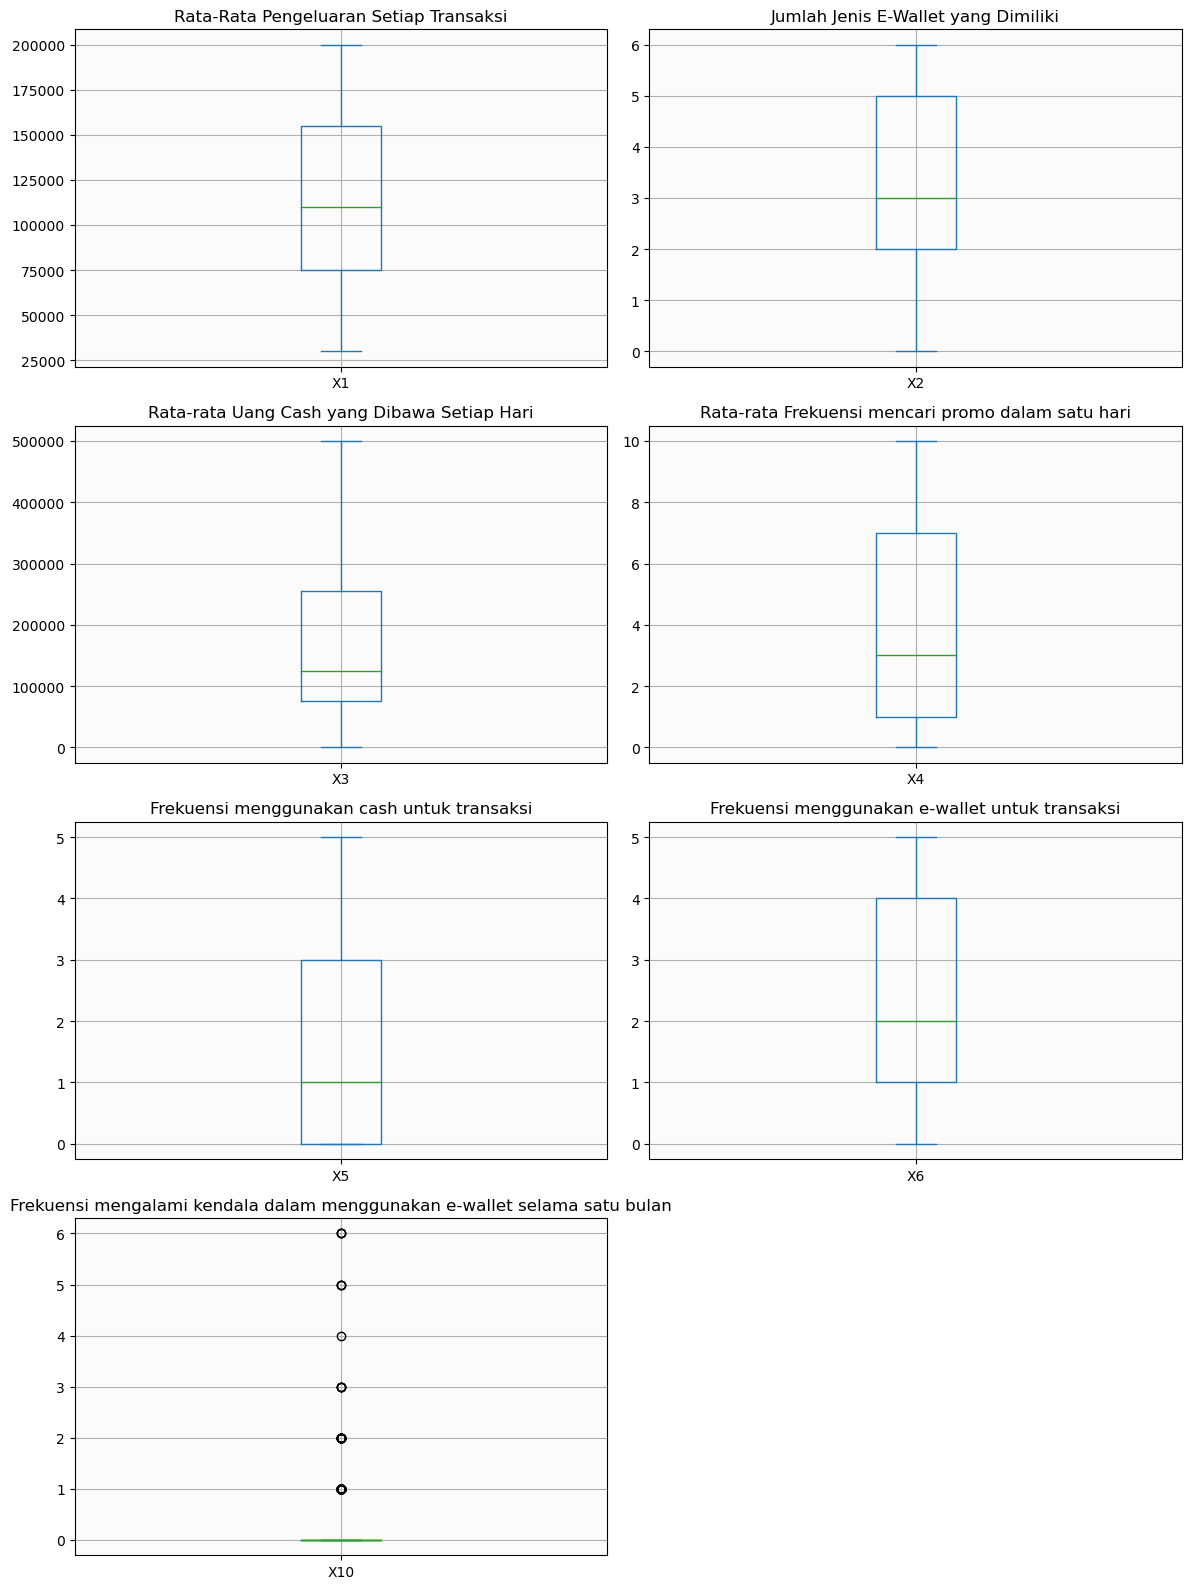

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X10']
titles = [
    "Rata-Rata Pengeluaran Setiap Transaksi",
    "Jumlah Jenis E-Wallet yang Dimiliki",
    "Rata-rata Uang Cash yang Dibawa Setiap Hari",
    "Rata-rata Frekuensi mencari promo dalam satu hari",
    "Frekuensi menggunakan cash untuk transaksi",
    "Frekuensi menggunakan e-wallet untuk transaksi",
    "Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan"
]

for i, ax in enumerate(axes.flatten()):
    if i < len(variables):
        data[variables[i]].plot(kind='box', ax=ax)
        ax.set_title(titles[i], fontsize=12)
        ax.grid(True)  # Add grid
        ax.set_facecolor('#f2f2f2')  # Set background color of the subplot
        ax.patch.set_alpha(0.3)
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


Berdasarkan pemeriksaan outliers di atas, terdapat beberapa outliers pada kolom "Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)". Akan tetapi, outliers tidak dibuang karena kolom tersebut dipengaruhi oleh kolom lain, yaitu "Pernahkah Mengalami Kendala dalam Menggunakan E-Wallet?". Pada kolom tersebut, ketika responden menjawab "No", maka kolom "Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)" akan bernilai "0". Sebaliknya, ketika responden menjawab "Yes", maka kolom "Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)" akan bernilai selain "0". Karena itu, data tidak dapat dianggap outliers.

## <font color=darkorange>K. Descriptive Statistics

Informasi statistika umum terkait data yang digunakan

In [12]:
data.describe()

,Usia,Angkatan,X1,X2,X3,X4,X5,X6,X10
count,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,20.76506,2020.190763,115522.088353,3.200803,172857.429719,3.797189,1.504016,2.385542,0.359438
std,0.65544,0.589781,45193.842662,1.928250,135835.020047,3.365261,1.567073,1.663900,0.844750
min,18.00000,2019.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,2020.000000,75000.000000,2.000000,75000.000000,1.000000,0.000000,1.000000,0.000000
50%,21.00000,2020.000000,110000.000000,3.000000,125000.000000,3.000000,1.000000,2.000000,0.000000
75%,21.00000,2020.000000,155000.000000,5.000000,255000.000000,7.000000,3.000000,4.000000,0.000000
max,23.00000,2022.000000,200000.000000,6.000000,500000.000000,10.000000,5.000000,5.000000,6.000000


Tabel di atas dapat diinterpretasikan sebagai berikut:

- Rata-rata usia responden adalah 20.765 dengan standar deviasi sebesar 0.655. Sebaran data dari usia responden berada di range mean ± 1 * std, yaitu berada pada rentang 20.11 ⩽ usia ⩽ 21.42 (dalam satuan tahun).
- Rata-rata pengeluaran setiap transaksi responden adalah sebesar 115522.088 dengan standar deviasi sebesar 45193.843. Sebaran data dari rata-rata pengeluaran setiap transaksi berada di range mean ± 1 * std, yaitu berada pada rentang 70328.245 ⩽ X1 ⩽ 1607150.931 (dalam satuan rupiah).
- Rata-rata jumlah jenis e-wallet yang dimiliki responden adalah sebesar 3.201 dengan standar deviasi sebesar 1.928. Sebaran data dari Rata-rata jumlah jenis e-wallet yang dimiliki responden berada di range mean ± 1 * std, yaitu berada pada rentang 1.273 ⩽ X2 ⩽ 5.129 (dalam satuan jenis).
- Rata-rata uang cash yang dibawa setiap hari oleh responden adalah sebesar 172857.430 dengan standar deviasi sebesar 135835.02. Sebaran data dari rata-rata uang cash yang dibawa setiap hari oleh responden berada di range mean ± 1 * std, yaitu berada pada rentang 37022.41 ⩽ X3 ⩽ 308692.45 (dalam satuan rupiah).
- Rata-rata frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain) adalah sebesar 3.797 dengan standar deviasi sebesar 3.365. Sebaran data dari rata-rata frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain) berada di range mean ± 1 * std, yaitu berada pada rentang 0.432 ⩽ X4 ⩽ 7.165 (dalam satuan kali).
- Rata-rata frekuensi menggunakan cash untuk transaksi per hari adalah sebesar 1.504 dengan standar deviasi sebesar 1.567. Sebaran data dari rata-rata frekuensi menggunakan cash untuk transaksi per hari berada di range mean ± 1 * std, yaitu berada pada rentang -0.063 ⩽ X5 ⩽ 3.071 (dalam satuan kali).
- Rata-rata frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan adalah sebesar 0.359 dengan standar deviasi sebesar 0.845. Sebaran data dari rata-rata frekuensi menggunakan e-wallet untuk transaksi per hari berada di range mean ± 1 * std, yaitu berada pada rentang -0.486 ⩽ X10 ⩽ 1.204 (dalam satuan kali).

## <font color=darkorange>L. Exploratory Data Analysis

### <font color=tan>Proportion of Categorical Data

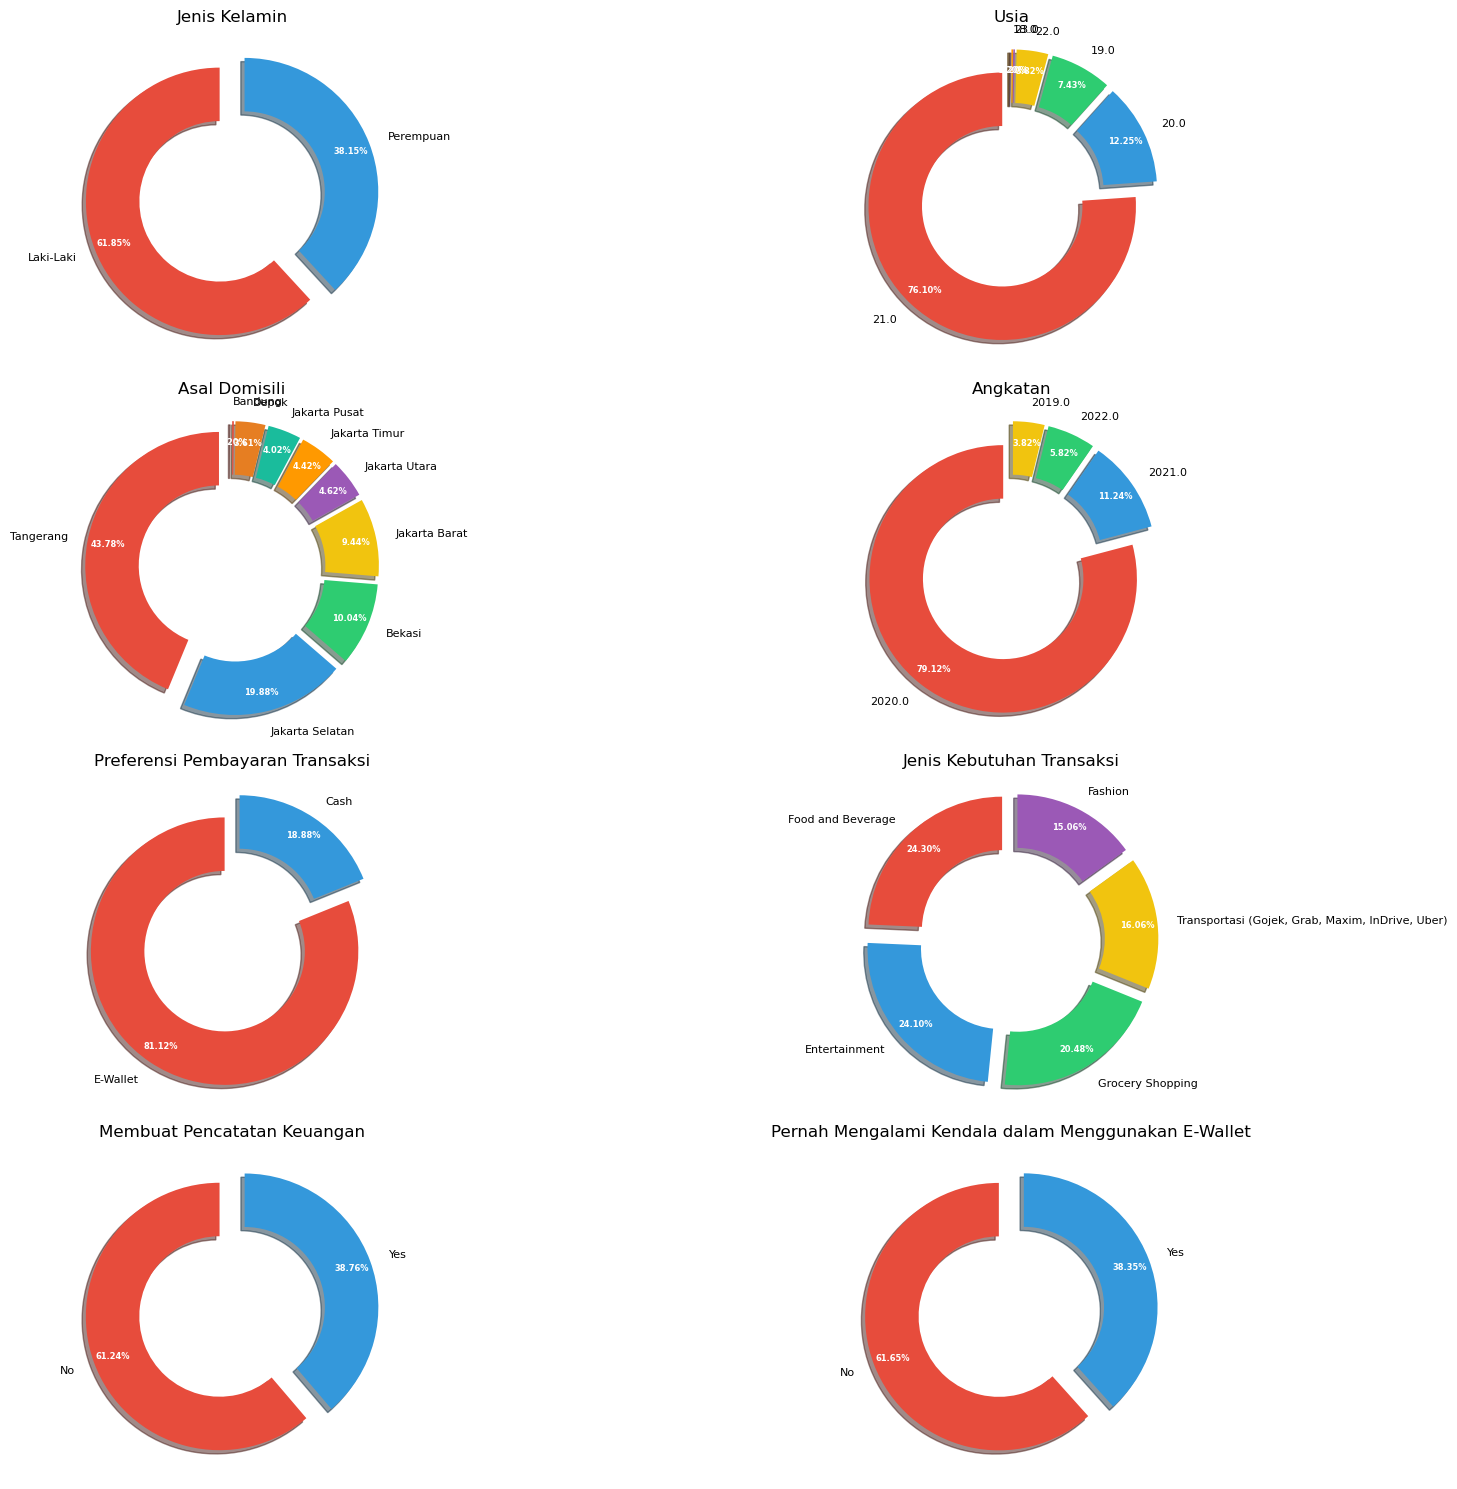

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

variables = ['Jenis Kelamin', 'Usia', 'Domisili', 'Angkatan', 'Y', 'X7', 'X8', 'X9']
titles = [
    'Jenis Kelamin',
    'Usia',
    'Asal Domisili',
    'Angkatan',
    'Preferensi Pembayaran Transaksi',
    'Jenis Kebutuhan Transaksi',
    'Membuat Pencatatan Keuangan',
    'Pernah Mengalami Kendala dalam Menggunakan E-Wallet'
]
color_palette = ['#E74C3C', '#3498DB', '#2ECC71', '#F1C40F', '#9B59B6', '#FF9900', '#1ABC9C', '#E67E22']
for i, ax in enumerate(axes.flatten()):
    if i < len(variables):
        value_counts = data[variables[i]].value_counts()
        total_count = value_counts.sum()
        wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, startangle=90, wedgeprops=dict(width=0.4),
                                          autopct='%.2f%%', pctdistance=0.85, shadow=True, explode=[0.1] * len(value_counts), colors=color_palette)
        ax.set_ylabel('')
        ax.set_title(titles[i], fontsize=12)
        ax.legend().set_visible(False) 
        
        # Draw a white circle at the center to create the doughnut effect
        center_circle = plt.Circle((0, 0), 0.10, fc='white')
        ax.add_artist(center_circle)
        
        # Adjust the font size of the percentage labels
        for autotext in autotexts:
            autotext.set_fontsize(6)
            autotext.set_color('white')  # Set the text color to white
            autotext.set_fontweight('bold')

        # Adjust the font size and color of the category labels
        for j, text in enumerate(texts):
            text.set_fontsize(8)
            text.set_color('black')  # Set the text color to black
            # Set the position of the category labels
            x, y = wedges[j].center
            theta = np.deg2rad((wedges[j].theta1 + wedges[j].theta2) / 2)
            r = wedges[j].r * 1.15  # Increase the scaling factor for a farther position
            x += np.cos(theta) * r
            y += np.sin(theta) * r
            text.set_position((x, y)) 
        
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa:
- Proporsi responden berjenis kelamin laki-laki lebih besar daripada perempuan,
- Proporsi terbesar dari usia responden adalah 21 tahun,
- Asal domisili responden mayoritas berasal dari Tangerang,
- Mayoritas responden merupakan angkatan 2020,
- Proporsi preferensi responden menggunakan e-wallet lebih besar daripada cash,
- Saat melakukan transaksi, jenis kebutuhan yang paling banyak dipilih oleh responden adalah food and beverage dan entertainment, sedangkan yang paling sedikit adalah fashion dan transportasi,
- Proporsi responden yang tidak melakukan pencatatan keuangan lebih sedikit dibandingkan yang melakukan, dan
- Proporsi responden yang tidak pernah mengalami kendala dalam menggunakan e-wallet lebih besar dibandingkan yang pernah.

### <font color=tan>Rata-rata Pengeluaran Setiap Transaksi berdasarkan Angkatan

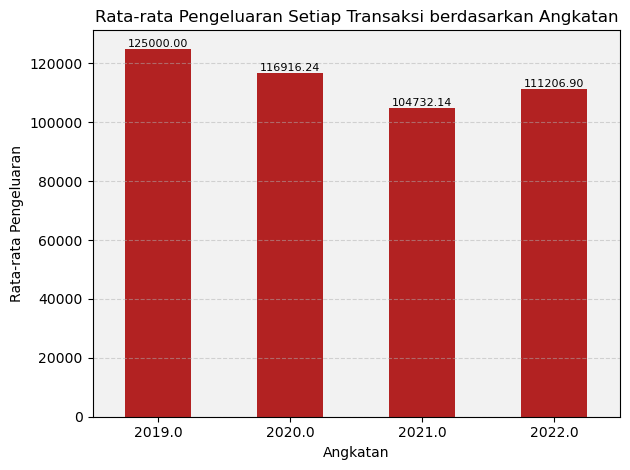

In [14]:
ax = data[['X1', 'Angkatan']].groupby(['Angkatan']).mean().plot(kind='bar', color='firebrick', legend=False)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, color='black')

plt.title("Rata-rata Pengeluaran Setiap Transaksi berdasarkan Angkatan")
plt.xlabel("Angkatan")
plt.ylabel("Rata-rata Pengeluaran")
plt.xticks(rotation=0)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add background color
ax.set_facecolor('#F2F2F2')

plt.tight_layout()
plt.show()

Urutan rata-rata pengeluaran setiap transaksi berdasarkan angkatan dimulai dari yang terbesar adalah 2019, 2020, 2022, dan 2021.

### <font color=tan>Rata-rata Pengeluaran Setiap Transaksi berdasarkan Jenis Kelamin dan Angkatan

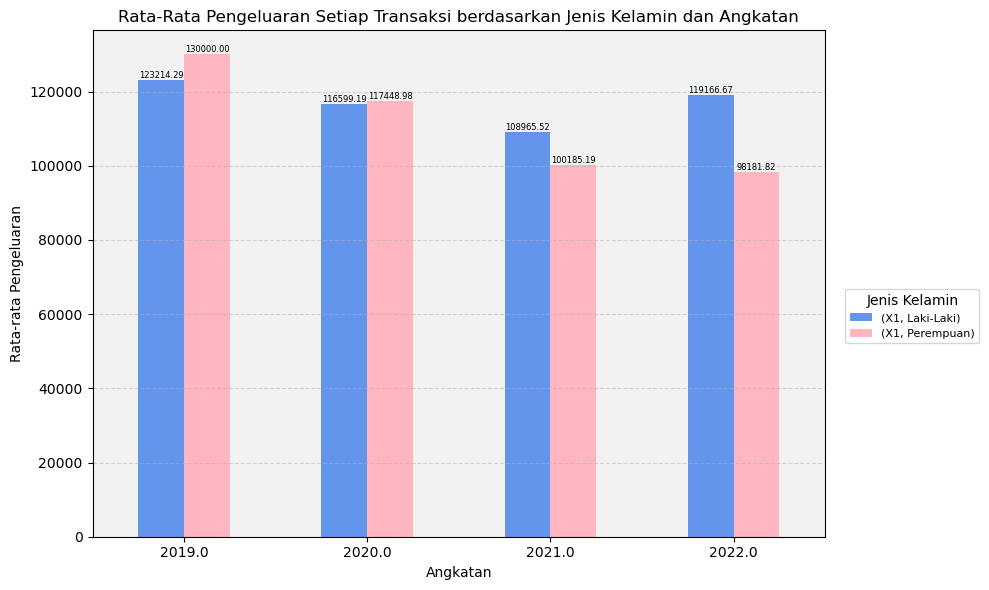

In [15]:
colors = ['cornflowerblue', 'lightpink']
fig, ax = plt.subplots(figsize=(10, 6))
data[['X1', 'Angkatan', 'Jenis Kelamin']].groupby(['Angkatan', 'Jenis Kelamin']).agg({'X1': 'mean'}).unstack().plot(kind='bar', color=colors, ax=ax)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=6, color='black')

plt.title("Rata-Rata Pengeluaran Setiap Transaksi berdasarkan Jenis Kelamin dan Angkatan")
plt.xlabel("Angkatan")
plt.ylabel("Rata-rata Pengeluaran")
plt.xticks(rotation=0)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add background color
ax.set_facecolor('#F2F2F2')

# Move legend to upper right corner
plt.legend(title='Jenis Kelamin', title_fontsize=10, fontsize=8, bbox_to_anchor=(1.02, 0.5), loc='upper left')

plt.tight_layout()
plt.show()

Responden angkatan 2021 dan 2022 berjenis kelamin laki-laki memiliki rata-rata pengeluaran setiap transaksi lebih besar dibandingkan perempuan. Sementara itu, responden angkatan 2019 dan 2020 berjenis kelamin perempuian memiliki rata-rata pengeluaran setiap transaksi lebih besar dibandingkan laki-laki. Namun, secara keseluruhan, dapat dilihat bahwa responden berjenis kelamin laki-laki memiliki rata-rata pengeluaran setiap transaksi lebih besar dibandingkan perempuan.

### <font color=tan>Rata-rata Uang Cash yang dibawa Setiap Hari oleh Mahasiswa berdasarkan Fakultas

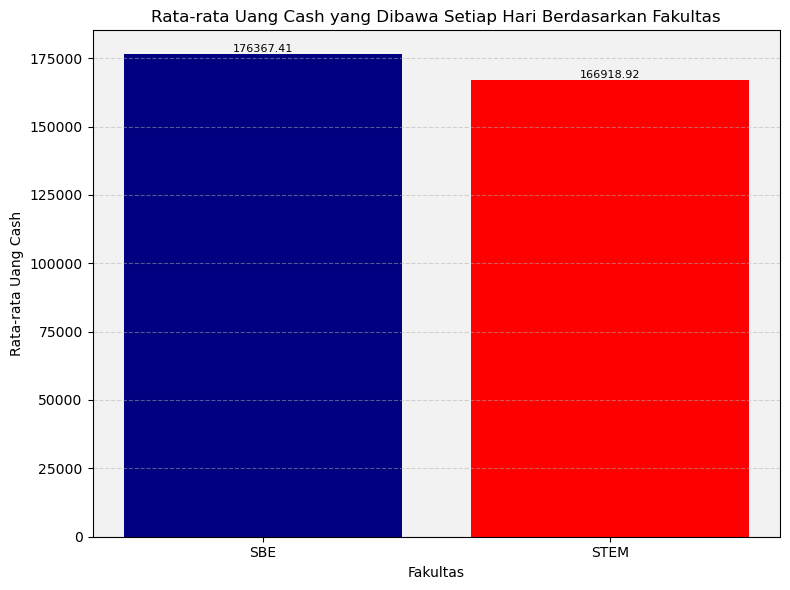

In [16]:
# Data preparation
data_mean = data[['Fakultas', 'X3']].groupby(['Fakultas']).mean()
preferensi_pembayaran = data_mean.index
rata_rata_uang = data_mean['X3']

# Define custom colors
colors = ['navy', 'red']

# Create a bar chart with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(preferensi_pembayaran, rata_rata_uang, color=colors)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, color='black')

plt.title("Rata-rata Uang Cash yang Dibawa Setiap Hari Berdasarkan Fakultas")
plt.xlabel("Fakultas")
plt.ylabel("Rata-rata Uang Cash")
plt.xticks(rotation=0)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add background color
ax.set_facecolor('#F2F2F2')

plt.tight_layout()
plt.show()

Berdasarkan bar chart di atas, rata-rata uang cash yang dibawa setiap hari oleh responden fakultas SBE lebih besar dibandingkan fakultas STEM.

### <font color=tan>Proporsi Jenis Kelamin Mahasiswa yang Membuat Pencatatan Keuangan

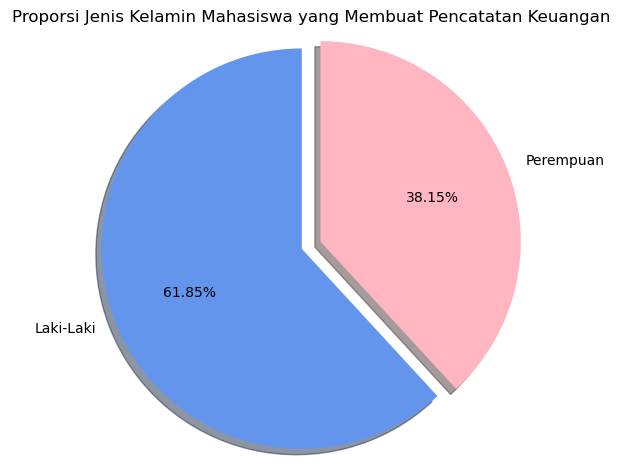

In [17]:
# Data preparation
data_counts = data[['X9', 'Jenis Kelamin']].groupby(['Jenis Kelamin']).count()
labels = data_counts.index
counts = data_counts['X9']
explode = [0.1, 0]  # Explode the first slice (Laki-Laki)

# Define custom colors
colors = ['cornflowerblue', 'lightpink']

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, explode=explode, colors=colors, autopct='%.2f%%', startangle=90, shadow=True)

# Remove the y-label
ax.set_ylabel('')

# Set the title
plt.title("Proporsi Jenis Kelamin Mahasiswa yang Membuat Pencatatan Keuangan")

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.tight_layout()
plt.show()


Proporsi responden yang membuat pencatatan keuangan lebih besar yang berjenis kelamin laki-laki dibandingkan perempuan.

### <font color=tan>Rata-rata Frekuensi Mencari Promo per Hari Berdasarkan Preferensi Pembayaran Transaksi

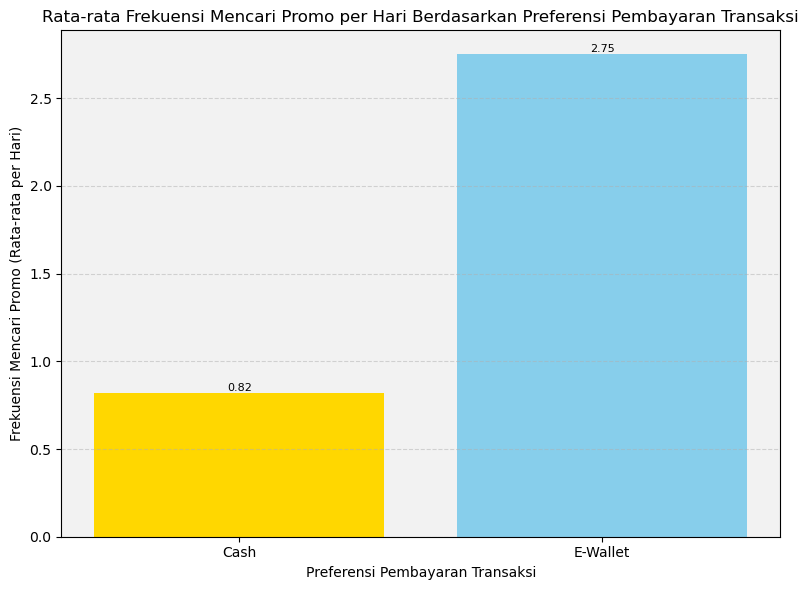

In [18]:
# Data preparation
data_mean = data[['Y', 'X6']].groupby(['Y']).mean()
preferensi_pembayaran = data_mean.index
rata_rata_promo = data_mean['X6']

# Define custom colors
colors = ['gold', 'skyblue']

# Create a bar chart with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(preferensi_pembayaran, rata_rata_promo, color=colors)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, color='black')

plt.title("Rata-rata Frekuensi Mencari Promo per Hari Berdasarkan Preferensi Pembayaran Transaksi")
plt.xlabel("Preferensi Pembayaran Transaksi")
plt.ylabel("Frekuensi Mencari Promo (Rata-rata per Hari)")
plt.xticks(rotation=0)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add background color
ax.set_facecolor('#F2F2F2')

plt.tight_layout()
plt.show()

Responden yang memiliki preferensi menggunakan e-wallet memiliki frekuensi mencari promo lebih tinggi dibandingkan yang memiliki preferensi menggunakan cash.

### <font color=tan>Persebaran Numerical Data

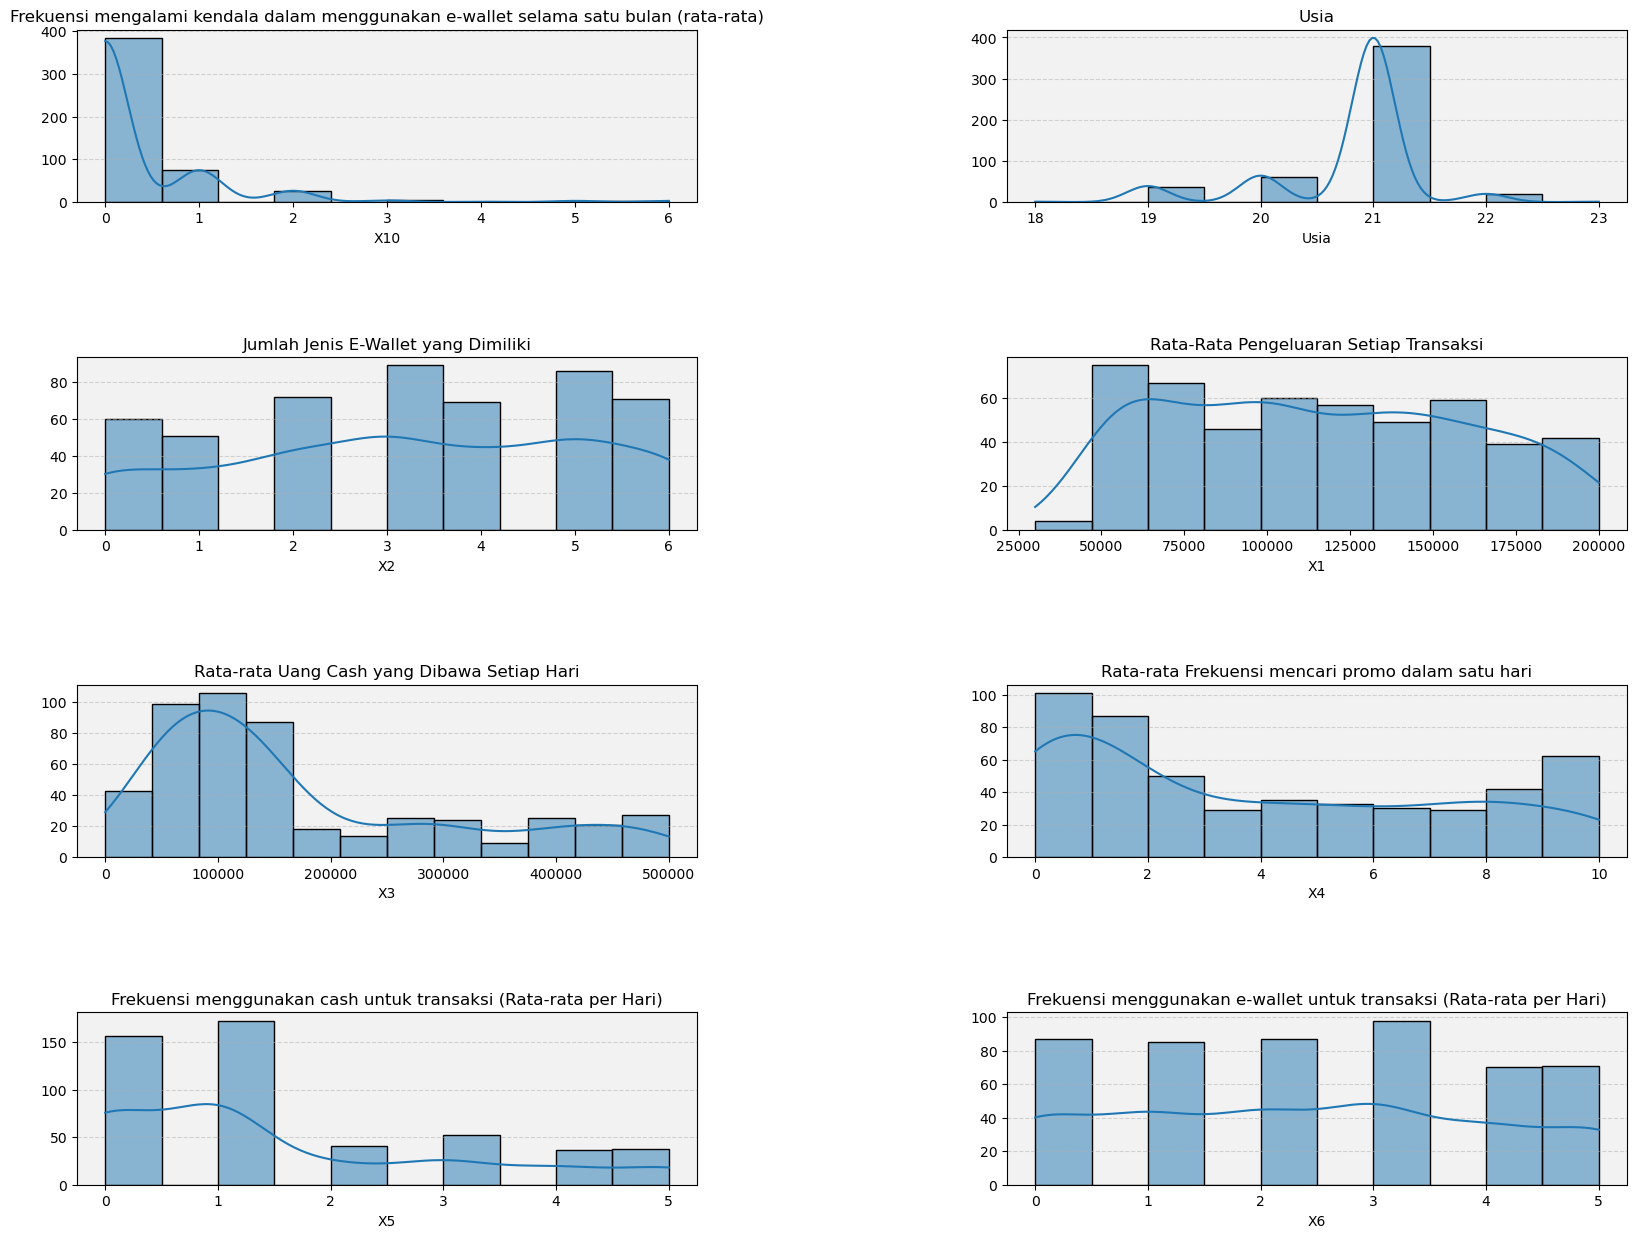

In [19]:
# Create a figure and adjust spacing
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.9, wspace=0.5)

# Subplot 1
ax = fig.add_subplot(4, 2, 1)
sns.histplot(data['X10'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Frekuensi mengalami kendala dalam menggunakan e-wallet selama satu bulan (rata-rata)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 2
ax = fig.add_subplot(4, 2, 2)
sns.histplot(data['Usia'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Usia')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 3
ax = fig.add_subplot(4, 2, 3)
sns.histplot(data['X2'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Jumlah Jenis E-Wallet yang Dimiliki')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 4
ax = fig.add_subplot(4, 2, 4)
sns.histplot(data['X1'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Rata-Rata Pengeluaran Setiap Transaksi')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 5
ax = fig.add_subplot(4, 2, 5)
sns.histplot(data['X3'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Rata-rata Uang Cash yang Dibawa Setiap Hari')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 6
ax = fig.add_subplot(4, 2, 6)
sns.histplot(data['X4'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Rata-rata Frekuensi mencari promo dalam satu hari')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 7
ax = fig.add_subplot(4, 2, 7)
sns.histplot(data['X5'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Frekuensi menggunakan cash untuk transaksi (Rata-rata per Hari)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

# Subplot 8
ax = fig.add_subplot(4, 2, 8)
sns.histplot(data['X6'], kde=True, ax=ax)
ax.set_ylabel('')
ax.set_title('Frekuensi menggunakan e-wallet untuk transaksi (Rata-rata per Hari)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#F2F2F2')

plt.show()

Berdasarkan histogram di atas, dapat dilihat bahwa:
- Persebaran usia responden tinggi di angka 21 tahun,
- Persebaran jumlah jenis e wallet yang dimiliki oleh responden tinggi pada angka 3 sampai 5,
- Persebaran rata-rata pengeluaran setiap transaksi cenderung tinggi di sekitar Rp50.000,00-Rp100.000,00,
- Persebaran rata-rata uang cash yang dibawa setiap hari cenderung tinggi di kisaran angka Rp50.000,00-Rp150.000,00,
- Persebaran rata-rata frekuensi mencari promo dalam satu hari (discount, cashback, dan lain-lain) cenderung tinggi di 0, tetapi fluktuatif untuk angka 2 sampai 10,
- Persebaran frekuensi menggunakan cash untuk transaksi (rata-rata per hari) cenderung tinggi di angka 0-1, dan
- Persebaran frekuensi menggunakan e-wallet untuk transaksi (rata-rata per hari) cenderung tinggi di angka 3.

### <font color=tan>Correlation between X and Y

In [20]:
data['Y'] = data['Y'].apply(lambda x: 0 if x=='Cash' else 1)

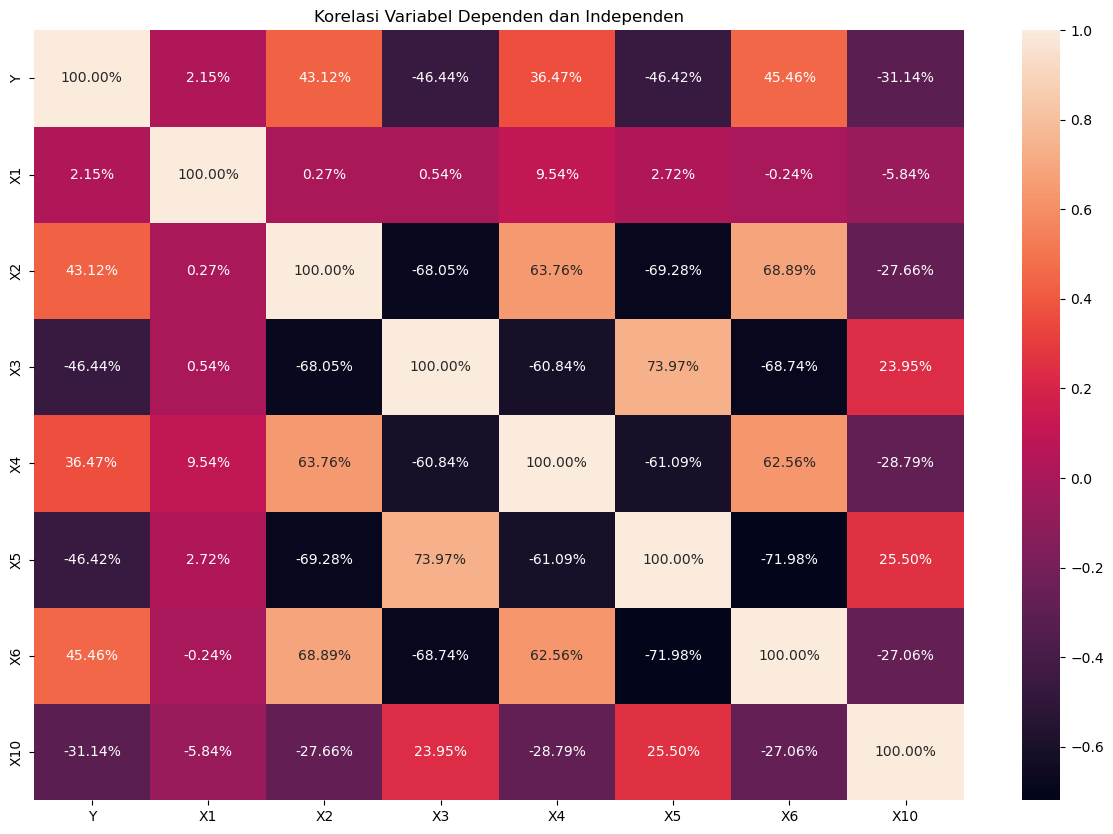

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.drop(['Usia','Angkatan'], axis=1).corr(),annot=True, fmt= ".2%")
plt.title("Korelasi Variabel Dependen dan Independen")
plt.show()

Variabel dependen yang memiliki korelasi tertinggi dengan variabel independen (Y) adalah X3, sedangkan yang terendah adalah X1. Nilai positif pada R menunjukkan bahwa hubungan antara variabel independen dan variabel dependen berbanding lurus (ketika variabel independen meningkat, maka terjadi peningkatan juga pada variabel dependen, begitupun sebaliknya). Nilai negatif pada R menunjukkan bahwa hubungan antara variabel independen dan variabel dependen berbanding terbalik (ketika variabel independen menurun, maka terjadi peningkatan pada variabel dependen, begitupun sebaliknya).

## <font color=darkorange>M. Data Preprocessing

### <font color=tan>Encode the Categorical Column into Numerical

In [22]:
olah=data[data.columns[6:]]
olah

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0,150000.0,2.0,300000.0,1.0,4.0,1.0,Food and Beverage,No,Yes,2.0
1,1,50000.0,3.0,150000.0,1.0,1.0,3.0,Food and Beverage,No,Yes,2.0
2,1,100000.0,2.0,0.0,0.0,0.0,4.0,Food and Beverage,No,Yes,2.0
3,1,150000.0,3.0,250000.0,0.0,1.0,5.0,Grocery Shopping,Yes,No,0.0
4,0,100000.0,1.0,500000.0,1.0,1.0,1.0,"Transportasi (Gojek, Grab, Maxim, InDrive, Uber)",Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...
494,1,130000.0,2.0,380000.0,1.0,3.0,1.0,Food and Beverage,No,Yes,1.0
495,1,180000.0,0.0,200000.0,0.0,5.0,0.0,Entertainment,No,No,0.0
496,1,185000.0,1.0,245000.0,0.0,2.0,1.0,Fashion,No,No,0.0
497,1,90000.0,0.0,480000.0,0.0,4.0,0.0,Grocery Shopping,No,No,0.0


In [23]:
le_x7 = preprocessing.LabelEncoder()
le_x7 = le_x7.fit(olah['X7'])
olah['X7'] = le_x7.transform(olah['X7'])

In [24]:
olah['X8'] = olah['X8'].apply(lambda x: 0 if x=='No' else 1)
olah['X9'] = olah['X9'].apply(lambda x: 0 if x=='No' else 1)

In [25]:
olah

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0,150000.0,2.0,300000.0,1.0,4.0,1.0,2,0,1,2.0
1,1,50000.0,3.0,150000.0,1.0,1.0,3.0,2,0,1,2.0
2,1,100000.0,2.0,0.0,0.0,0.0,4.0,2,0,1,2.0
3,1,150000.0,3.0,250000.0,0.0,1.0,5.0,3,1,0,0.0
4,0,100000.0,1.0,500000.0,1.0,1.0,1.0,4,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
494,1,130000.0,2.0,380000.0,1.0,3.0,1.0,2,0,1,1.0
495,1,180000.0,0.0,200000.0,0.0,5.0,0.0,0,0,0,0.0
496,1,185000.0,1.0,245000.0,0.0,2.0,1.0,1,0,0,0.0
497,1,90000.0,0.0,480000.0,0.0,4.0,0.0,3,0,0,0.0


### <font color=tan>Splitting Data

Membagi data menjadi 75% training data dan 25% testing data.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(olah[olah.columns[1:]], olah['Y'], test_size=0.25, random_state=32)

In [27]:
y_test

344    1
331    1
291    1
80     1
58     0
      ..
309    1
164    1
336    1
110    0
343    1
Name: Y, Length: 125, dtype: int64

### <font color=tan>Normalization Data

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)

In [29]:
X_test = scaler.transform(x_test)

In [30]:
print(f'Shape of X Train= {X_train.shape}, Shape of X Test = {X_test.shape}')
print(f'Shape of y Train= {y_train.shape}, Shape of y Test = {y_test.shape}')

Shape of X Train= (373, 10), Shape of X Test = (125, 10)
Shape of y Train= (373,), Shape of y Test = (125,)


## <font color=darkorange>N. Decision Tree

Variabel Independen disini merupakan gabungan dari variabel kategorikal (X2, X7, X8, X9) dan variabel kontinu (X1, X3, X4, X5, X6, X10). 

### <font color=tan>Modeling Data

In [31]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt = dt.fit(X_train, y_train)

In [32]:
clf_pred_test =dt.predict(X_test)

clf_pred_train =dt.predict(X_train)

In [33]:
clf_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

### <font color=tan>Model Evaluation

**Accuracy**

In [34]:
print('Accuracy Testing:', metrics.accuracy_score(y_test, clf_pred_test))

Accuracy Testing: 0.856


In [35]:
print('Accuracy Training:', metrics.accuracy_score(y_train, clf_pred_train))

Accuracy Training: 0.9115281501340483


**Confusion Matrix**

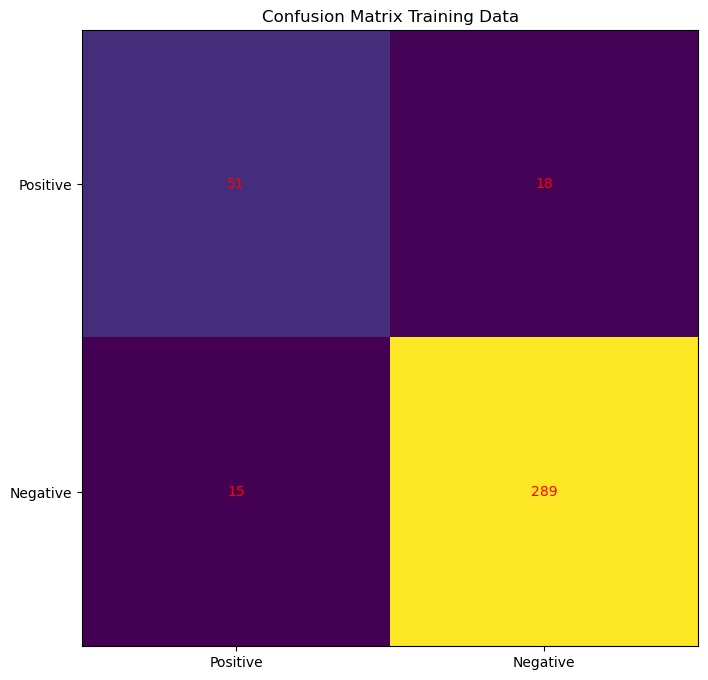

In [36]:
cm = confusion_matrix(y_train, clf_pred_train)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_title("Confusion Matrix Training Data")
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

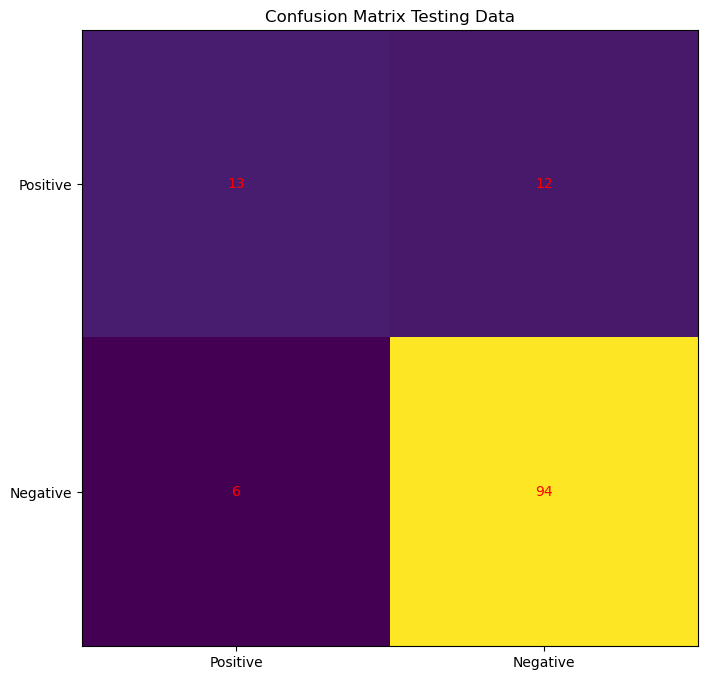

In [37]:
cm1 = confusion_matrix(y_test, clf_pred_test)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_title("Confusion Matrix Testing Data")
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm1[i,j], ha='center',va='center',color='red')

plt.show()

**Accuracy, Precision, Sensitivity**

In [38]:
TN_train = cm[0][0]
TP_train = cm[1][1]
FN_train = cm[1][0]
FP_train = cm[0][1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train+ TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

In [39]:
print('''Akurasi': {}
Sensitivitasi: {}
Presisi: {}'''.format(accuracy_train, sensitivity_train, precision_train))

Akurasi': 0.9115281501340483
Sensitivitasi: 0.9506578947368421
Presisi: 0.9413680781758957


In [40]:
TN_test = cm1[0][0]
TP_test = cm1[1][1]
FN_test = cm1[1][0]
FP_test = cm1[0][1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test+ TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

In [41]:
print('''Akurasi': {}
Sensitivitasi: {}
Presisi: {}'''.format(accuracy_test, sensitivity_test, precision_test))

Akurasi': 0.856
Sensitivitasi: 0.94
Presisi: 0.8867924528301887


### <font color=tan>Comparison between Training and Testing

In [42]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,91.15%,85.60%
1,Sensitivity,95.07%,94.00%
2,Precision,94.14%,88.68%


Pada metode Decision Tree, accuracy training data (91.15%) lebih tinggi dibandingkan testing data (85.6%). Karena tingkat accuracy training data lebih tinggi dibandingkan testing data, maka model ini overfitting. Sensitivity training data (95.07%) juga lebih tinggi dibandingkan testing data (94.00%). Precision pada training data (94.14%) juga lebih tinggi dibandingkan testing data (88.68%).

### <font color=tan>Decision Tree Plot

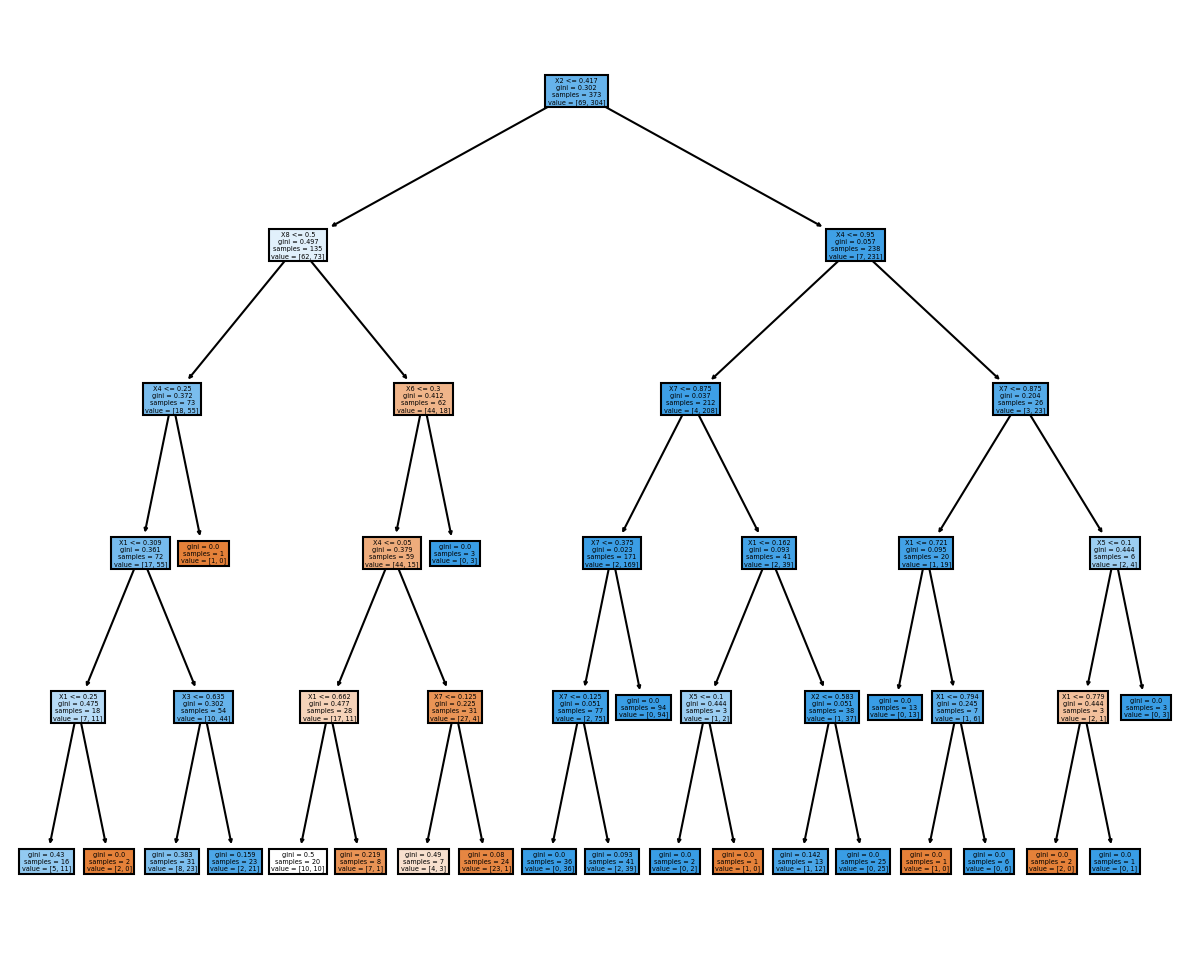

In [43]:
plt.figure(figsize=(10,8), dpi=150)
tree.plot_tree(dt, feature_names=x_train.columns, filled=True);

## <font color=darkorange>O. Random Forest

### <font color=tan>Model Fitting

In [44]:
rf = RandomForestClassifier(max_features = 0.5,max_depth = 3, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### <font color=tan>Model Evaluation

**Accuracy**

In [45]:
print('Accuracy:', rf.score(X_test, y_test))

Accuracy: 0.848


In [46]:
rf.score(X_train, y_train)

0.8954423592493298

**Confusion Matrix**

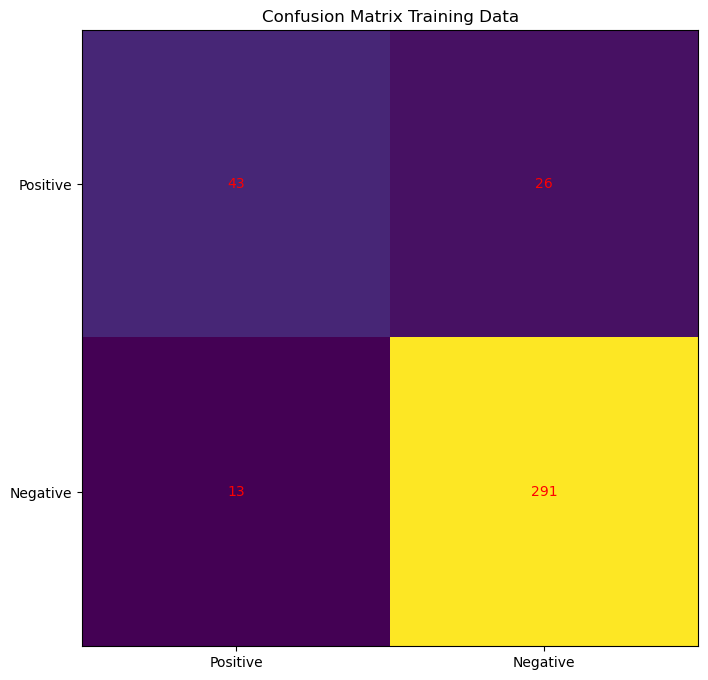

In [47]:
cm2 = confusion_matrix(y_train, rf.predict(X_train))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm2)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)
ax.set_title("Confusion Matrix Training Data")

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm2[i,j], ha='center',va='center',color='red')

plt.show()

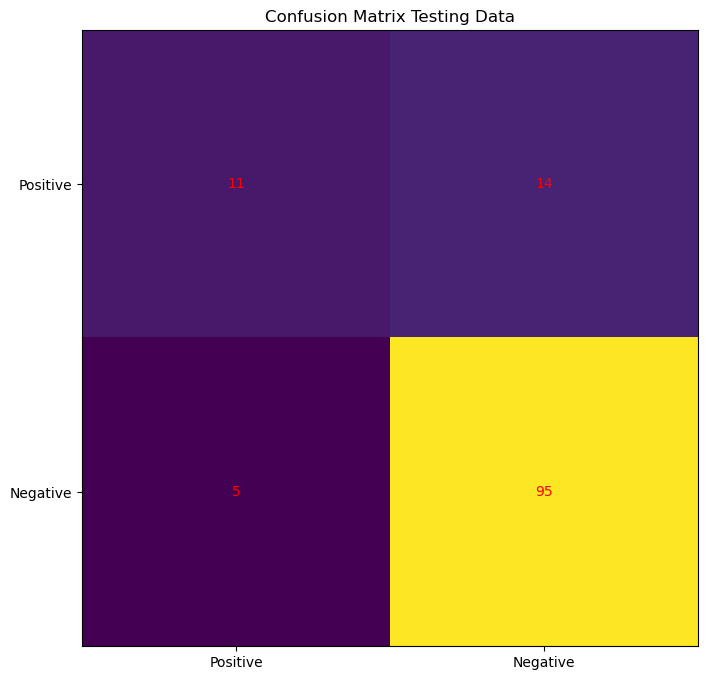

In [48]:
cm3 = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm3)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)
ax.set_title("Confusion Matrix Testing Data")

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm3[i,j], ha='center',va='center',color='red')

plt.show()

In [49]:
TN_train = cm2[0][0]
TP_train = cm2[1][1]
FN_train = cm2[1][0]
FP_train = cm2[0][1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train+ TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

In [50]:
TN_test = cm3[0][0]
TP_test = cm3[1][1]
FN_test = cm3[1][0]
FP_test = cm3[0][1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test+ TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

### <font color=tan> Comparison between Testing and Training Data

In [51]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,89.54%,84.80%
1,Sensitivity,95.72%,95.00%
2,Precision,91.80%,87.16%


Pada metode Random Forest, accuracy training data (89.54%) lebih tinggi dibandingkan testing data (84.80%). Karena tingkat accuracy training data lebih tinggi dibandingkan testing data, maka model ini overfitting. Sensitivity training data (95.72%) juga lebih tinggi dibandingkan testing data (95.00%). Precision pada training data (91.80%) juga lebih tinggi dibandingkan testing data (87.16%).

## <font color=darkorange>P. Naive Bayes Classification

### <font color=tan>Modeling

In [52]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#gnb.score(y_pred,y_test)

In [53]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [54]:
np.array(y_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

### <font color=tan>Model Evaluation

**Accuracy**

In [55]:
gnb.score(X_train,y_train)

0.7989276139410187

In [56]:
gnb.score(X_test,y_test)

0.792

**Confusion Matrix**

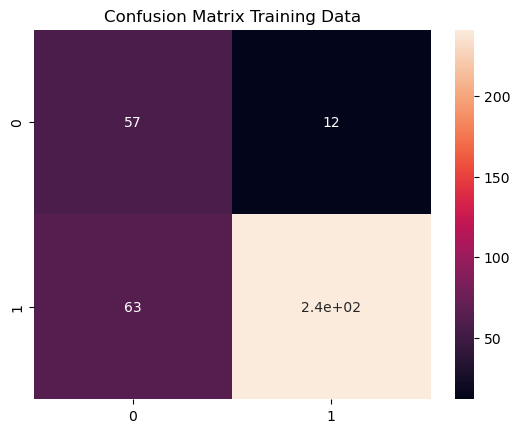

In [57]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_train, gnb.predict(X_train))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True)
ax.set_title('Confusion Matrix Training Data')
plt.show()

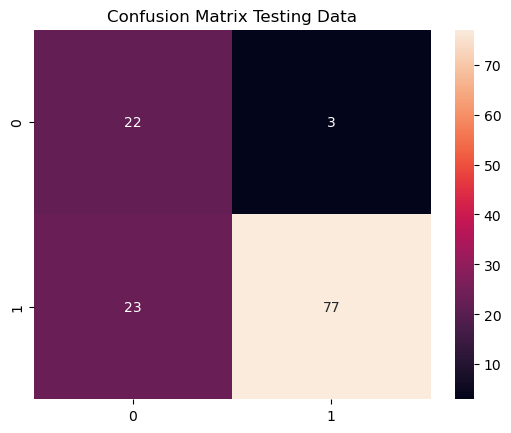

In [58]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True)
ax.set_title('Confusion Matrix Testing Data')
plt.show()

**Accuracy, Sensitivity, Precision**

In [59]:
CM = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_pred))
CM

,0,1
0,22,3
1,23,77


In [60]:
TN_test = CM[0][0]
TP_test = CM[1][1]
FN_test = CM[1][0]
FP_test = CM[0][1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test+ TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

In [61]:
print('''Akurasi': {}
Sensitivitasi: {}
Presisi: {}'''.format(accuracy_test, sensitivity_test, precision_test))

Akurasi': 0.792
Sensitivitasi: 0.9625
Presisi: 0.77


In [62]:
CM1 = pd.DataFrame(sklearn.metrics.confusion_matrix(y_train, gnb.predict(X_train)))
CM1

,0,1
0,57,12
1,63,241


In [63]:
TN_train = CM1[0][0]
TP_train = CM1[1][1]
FN_train = CM1[1][0]
FP_train = CM1[0][1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train+ TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

In [64]:
print('''Akurasi': {}
Sensitivitasi: {}
Presisi: {}'''.format(accuracy_train, sensitivity_train, precision_train))

Akurasi': 0.7989276139410187
Sensitivitasi: 0.9525691699604744
Presisi: 0.7927631578947368


### <font color=tan>Comparison between Testing and Training Data

In [65]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,79.89%,79.20%
1,Sensitivity,95.26%,96.25%
2,Precision,79.28%,77.00%


Pada metode Naive Bayes, accuracy training data (79.89%) sedikit lebih tinggi dibandingkan testing data (79.20%). Karena selisih tingkat accuracy training data dan testing data, maka model ini tidak termasuk overfitting. Sensitivity training data (95.26%) lebih rendah dibandingkan testing data (96.25%). Precision pada training data (79.28%) lebih tinggi dibandingkan testing data (77.00%).

## <font color=darkorange>Q. Comparison Between Random Forest, Decision Tree, Naive Bayes Classifier

In [66]:
models = ['Random Forest', 'Decision Tree', 'Naive Bayes']
training_akurasi = [round(rf.score(X_train, y_train),4)*100,round(dt.score(X_train, y_train),4)*100,round(gnb.score(X_train,y_train),4)*100]
testing_akurasi = [round(rf.score(X_test, y_test),4)*100,round(dt.score(X_test, y_test),4)*100,round(gnb.score(X_test,y_test),4)*100]
akurasi = {'Metode':models, 'Akurasi Training':training_akurasi,'Akurasi Testing':testing_akurasi}
akurasi = pd.DataFrame(akurasi)
akurasi

,Metode,Akurasi Training,Akurasi Testing
0,Random Forest,89.54,84.8
1,Decision Tree,91.15,85.6
2,Naive Bayes,79.89,79.2


Ketiga metode menghasilkan tingkat akurasi training data yang lebih tinggi dibandingkan testing data, maka tergolong overfitting. Pada metode random forest, akurasi pada training data (89.54%) lebih tinggi dibandingkan testing data (84.8%). Kemudian pada metode decision tree, akurasi pada training data (91.15%) juga lebih tinggi dibandingkan testing data (85.6%). Lalu, pada metode Naive Bayes, akurasi pada training data (79.89%) juga sedikit lebih tinggi dibandingkan testing data (79.2%). Secara keseluruhan, akurasi pada metode decision tree paling tinggi dibandingkan kedua metode lainnya, yaitu Random Forest dan Naive Bayes. 

## <font color=darkorange>R. Kesimpulan

Berdasarkan hasil analisis kebiasaan mahasiswa Universitas Prasetiya Mulya dalam melakukan transaksi (E-wallet dan Cash), dapat disimpulkan bahwa:
1. Responden cenderung menggunakan e-wallet daripada cash,
2. Saat melakukan transaksi, jenis kebutuhan yang paling banyak dipilih oleh responden adalah food and beverage dan entertainment, sedangkan yang paling sedikit adalah fashion dan transportasi,
3. Mayoritas responden tidak pernah mengalami kendala penggunaan e-wallet,
4. Responden dengan rata-rata pengeluaran setiap transaksi terbesar merupakan angkatan 2019, sedangkan yang paling sedikit adalah 2021,
5. Responden laki-laki memiliki rata-rata pengeluaran setiap transaksi lebih besar dibandingkan perempuan, 
6. Rata-rata uang cash yang dibawa setiap hari oleh responden fakultas SBE lebih besar dibandingkan fakultas STEM, dan
7. Responden yang menggunakan e-wallet memiliki frekuensi mencari promo lebih tinggi dibandingkan yang menggunakan cash.

Lalu, berdasarkan perbandingan metode Decision Tree, Random Forest, dan Naive Bayes, dapat disimpulkan bahwa Decision Tree merupakan metode yang terbaik untuk memprediksi preferensi metode pembayaran mahasiswa Prasetiya Mulya karena memiliki tingkat akurasi yang tinggi.